# Proyecto de Ciencia de Datos

**Autor:** Victor Hugo Villegas  
**Nombre del proyecto:** Google Advanced Data Analysis: HR Capstone Dataset  
**Fecha:** 08 de mayo de 2025  
**Descripción:** Análisis exploratorio y modelado predictivo para identificar factores clave en la rotación de empleados dentro de la empresa Salifort Motors.  


✅ **Paso 1: Planificación - Cargar y familiarizarse con el dataset**  
Este primer paso nos permitirá:

- Cargar los datos.
- Revisar la estructura del dataset.
- Comprender las variables.
- Confirmar que `left` es la variable objetivo.


##### 📊 Manipulación de Datos

Estas librerías permiten la gestión y transformación de datos, facilitando su análisis y preprocesamiento.  
- **NumPy**: Para cálculos matemáticos y manejo de arrays eficientes.  
- **Pandas**: Para la manipulación y análisis de datos en estructuras como DataFrames y Series.  

```python
import numpy as np
import pandas as pd


In [4]:
import numpy as np
import pandas as pd

##### 📈 Visualización de Datos

Estas librerías ayudan a generar gráficos y representaciones visuales del dataset, facilitando su interpretación.  
- **Matplotlib**: Proporciona herramientas básicas de visualización con gráficos estáticos.  
- **Seaborn**: Extensión de Matplotlib que permite visualizaciones más detalladas y estilizadas.  

```python
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

##### ⚙️ Configuración de DataFrames

Esta configuración permite visualizar todas las columnas del DataFrame sin restricciones, facilitando el análisis exploratorio y evitando que se oculten datos importantes.

```python
pd.set_option('display.max_columns', None)


In [8]:
pd.set_option('display.max_columns', None)

##### 📏 Métricas y Evaluación

Estas funciones permiten medir el rendimiento de los modelos y evaluar su precisión, asegurando una selección óptima.  
- **GridSearchCV**: Método para optimizar hiperparámetros mediante validación cruzada.  
- **Train-Test Split**: Divide los datos en conjuntos de entrenamiento y prueba.  
- **Métricas de clasificación**: Incluyen precisión, recall, F1-score y AUC-ROC para evaluar el rendimiento del modelo.  

```python
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, roc_auc_score, roc_curve)


In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, roc_auc_score, roc_curve)

##### 🤖 Modelado de Datos

Estas librerías se utilizan para construir y evaluar modelos de aprendizaje supervisado que permitirán predecir la rotación de empleados.  
- **XGBoost**: Algoritmo basado en árboles de decisión, eficiente para problemas de clasificación y regresión.  
- **Regresión Logística**: Modelo estadístico usado para clasificación binaria.  
- **Árboles de Decisión**: Técnica de clasificación basada en reglas.  
- **Bosques Aleatorios**: Conjunto de árboles de decisión que mejora la precisión del modelo.  

```python
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [40]:
!pip install xgboost --upgrade


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [41]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

##### 💾 Guardado de Modelos

Estas herramientas permiten almacenar los modelos entrenados para su uso posterior sin necesidad de volver a entrenarlos.  
- **Pickle**: Biblioteca para serializar y deserializar objetos de Python, facilitando la conservación de modelos entrenados.  

```python
import pickle


In [16]:
import pickle

##### Cargar el Dataset y Visualizaciones Preliminares

En esta sección, se carga el dataset y se realizan las primeras exploraciones de los datos. Se examinan las dimensiones, tipos de variables y valores faltantes para entender la estructura del dataset antes del análisis profundo.

---


In [5]:
# Ruta del archivo
file_path = 'C:/Users/victo/OneDrive/Data_Science/Python/HR_capstone_dataset.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Ver las primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [20]:
# Revisar valores únicos en la variable objetivo
print("\nValores únicos en la variable objetivo (left):")
print(df['left'].value_counts())



Valores únicos en la variable objetivo (left):
left
0    11428
1     3571
Name: count, dtype: int64


In [6]:
# Tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Nombre de las columnas y tipos de datos
print("\nInformación general:")
df.info()

# Revisar valores únicos en la variable objetivo
print("\nValores únicos en la variable objetivo (left):")
print(df['left'].value_counts())


Tamaño del dataset: (14999, 10)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Valores únicos en la variable objetivo (left):
left
0    11428
1     3571
Name: count, dtype: int64


In [15]:
# Ver tipos de datos y asegurarse de que las variables categóricas están bien identificadas
print("Tipos de datos en el dataset:")
print(df.dtypes)


Tipos de datos en el dataset:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [19]:
# Tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Nombre de las columnas y tipos de datos
print("\nInformación general:")
df.info()

# Revisar valores únicos en la variable objetivo
print("\nValores únicos en la variable objetivo (left):")
print(df['left'].value_counts())


Tamaño del dataset: (14999, 10)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Valores únicos en la variable objetivo (left):
left
0    11428
1     3571
Name: count, dtype: int64


✅ **Lo que ya sabemos:**
- El dataset se cargó correctamente: tiene **14,999 registros** y **10 columnas**.
- No hay valores nulos, lo que nos facilita bastante el análisis.
- La variable objetivo `left` es binaria:
  - **0** → El empleado no se fue (**11,428 casos**).
  - **1** → El empleado sí se fue (**3,571 casos**).
- Esto nos muestra un cierto desbalance en las clases (~**76% no se fue**, ~**24% sí se fue**), que habrá que tener en cuenta al modelar.
- Hay algunos nombres de columnas que podemos mejorar para estandarizarlos:
  - `average_montly_hours` tiene un error ortográfico ("montly" → "monthly").
  - Hay mezcla entre mayúsculas y minúsculas (`Work_accident`, `Department`, etc.).


✅ **Paso 2: Analilsis de Exploracion de Datos (EDA)**  

##### A. Renombrar columnas para que sean consistentes, en minúscula y sin errores
- Convertir todas las columnas a **minúsculas**.
- Corregir errores ortográficos en los nombres de columnas.
- Unificar el formato y eliminar espacios innecesarios.


In [20]:
# Revisar nombres actuales
print(df.columns)

# Renombrar columnas para mejorar consistencia y corregir errores
df.rename(columns={
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'n_projects',
    'average_montly_hours': 'avg_monthly_hours',  # corregido
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'promotion_last_5years': 'recent_promotion',
    'Department': 'department',
    'salary': 'salary',
    'left': 'left'  # mantenemos como está
}, inplace=True)

# Verificar cambios
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
Index(['satisfaction', 'evaluation', 'n_projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'left', 'recent_promotion', 'department',
       'salary'],
      dtype='object')


In [21]:
df.head()

,satisfaction,evaluation,n_projects,avg_monthly_hours,tenure,work_accident,left,recent_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### B. Exploracion y Limpieza de Datos
###### 📌 Objetivo  
Entender la estructura de los datos, identificar patrones y preparar el dataset para el análisis y la construcción de modelos predictivos.

###### 🚀 Acciones  
###### 📊 Estadísticas Descriptivas  
Analizaremos las principales medidas estadísticas para variables numéricas:  
- **Media**: Promedio de los valores para entender tendencias generales.  
- **Mediana**: Punto central de la distribución, útil cuando existen valores extremos.  
- **Desviación estándar**: Grado de variabilidad de los datos, indicando qué tan dispersos están respecto a la media.  
- **Distribución y rangos**: Valores mínimos, máximos y percentiles para evaluar la dispersión de los datos.  

###### 🔍 Detección de Valores Nulos  
Identificaremos posibles datos faltantes y analizaremos su impacto en el dataset. Se tomarán decisiones sobre imputación o eliminación si es necesario.  

###### 🚫 Identificación de Valores Atípicos  
Exploraremos la presencia de valores anómalos mediante boxplots y otras técnicas de detección.  

###### 🎭 Análisis de Variables Categóricas  
Revisaremos la distribución de datos categóricos, contando sus frecuencias y analizando la cardinalidad de las categorías.  

###### 🔄 Normalización y Transformaciones  
Si es necesario, aplicaremos escalado o transformación de datos para mejorar la calidad del análisis y el rendimiento de los modelos.  

---

El EDA permitirá obtener una visión completa del dataset para tomar decisiones acertadas para la preparación de datos. ¡Comienzo con la exploración! 🚀📊  


#### 📖 Diccionario de Datos  

Este proyecto utiliza un dataset llamado **HR_capstone_dataset.csv**, que contiene información autoinformada de empleados en una corporación multinacional ficticia dedicada a la fabricación de vehículos.  

##### 📌 Estructura del Dataset  
El dataset consta de:  
- **14,999 filas** → Cada fila representa un empleado único.  
- **10 columnas** → Variables con características clave sobre cada empleado.  

##### 📊 **Descripción de las Variables**  

| **Columna**            | **Tipo**  | **Descripción** |
|------------------------|----------|-----------------------------------------------|
| satisfaction_level     | `int64`  | Nivel de satisfacción del empleado [0-1] |
| last_evaluation       | `int64`  | Puntaje de la última evaluación de desempeño [0-1] |
| number_project        | `int64`  | Número de proyectos en los que participa el empleado |
| average_monthly_hours | `int64`  | Promedio de horas trabajadas por mes |
| time_spend_company    | `int64`  | Años de experiencia en la compañía |
| work_accident        | `int64`  | Si el empleado ha sufrido un accidente laboral (0 = No, 1 = Sí) |
| left                 | `int64`  | Si el empleado ha dejado la compañía (0 = No, 1 = Sí) |
| promotion_last_5years | `int64`  | Si el empleado ha sido promovido en los últimos 5 años (0 = No, 1 = Sí) |
| department           | `str`    | Departamento donde trabaja el empleado |
| salary              | `str`    | Nivel de salario: `low`, `medium`, `high` |

---

Esta sección servirá como referencia antes de analizar los histogramas y distribuciones de datos en el **EDA**, permitiendo interpretar mejor la relación entre las variables.  

📊 **Ahora que ya tenemos la estructura del dataset clara, podemos proceder con el análisis visual!** 🚀  


In [16]:
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%           

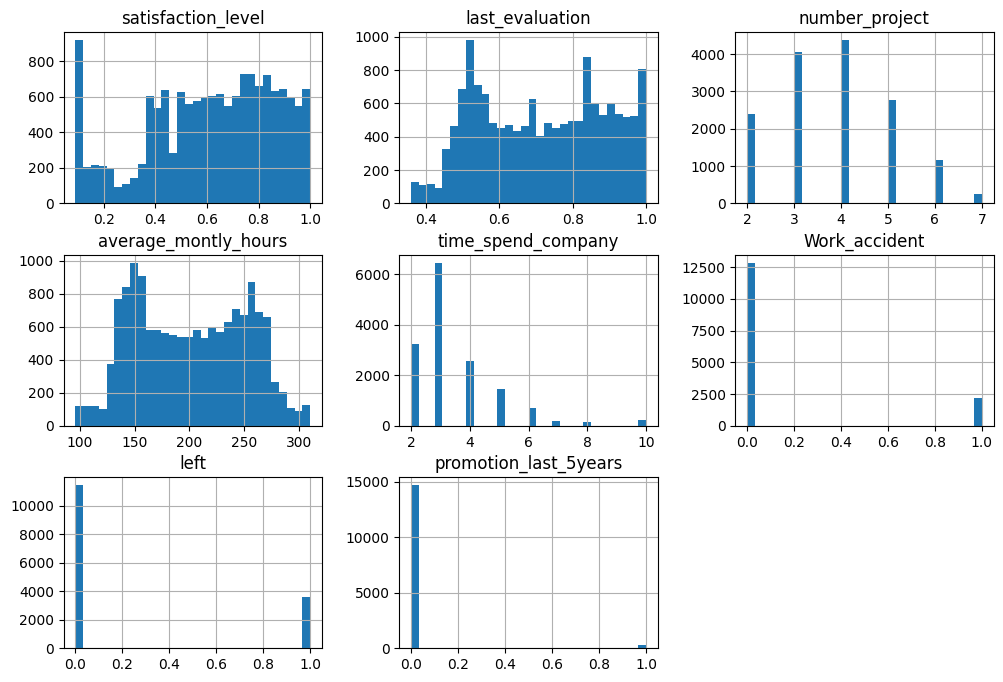

In [19]:
import matplotlib.pyplot as plt  # Importar matplotlib

# Histograma para ver la distribución de cada variable numérica
df.hist(figsize=(12,8), bins=30)
plt.show()  


🧹 **Detección de duplicados**
Verificar si hay registros duplicados exactos en el dataset.


In [22]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 3008


In [23]:
# Eliminar duplicados si los hay
df = df.drop_duplicates()
print(f"Nuevo tamaño del dataset: {df.shape}")


Nuevo tamaño del dataset: (11991, 10)


📊 **Detección de outliers**  
Nos interesa especialmente mirar outliers en variables numéricas como:

- `satisfaction`
- `evaluation`
- `n_projects`
- `avg_monthly_hours`
- `tenure`

Podemos usar **boxplots** para empezar a visualizar posibles valores extremos.


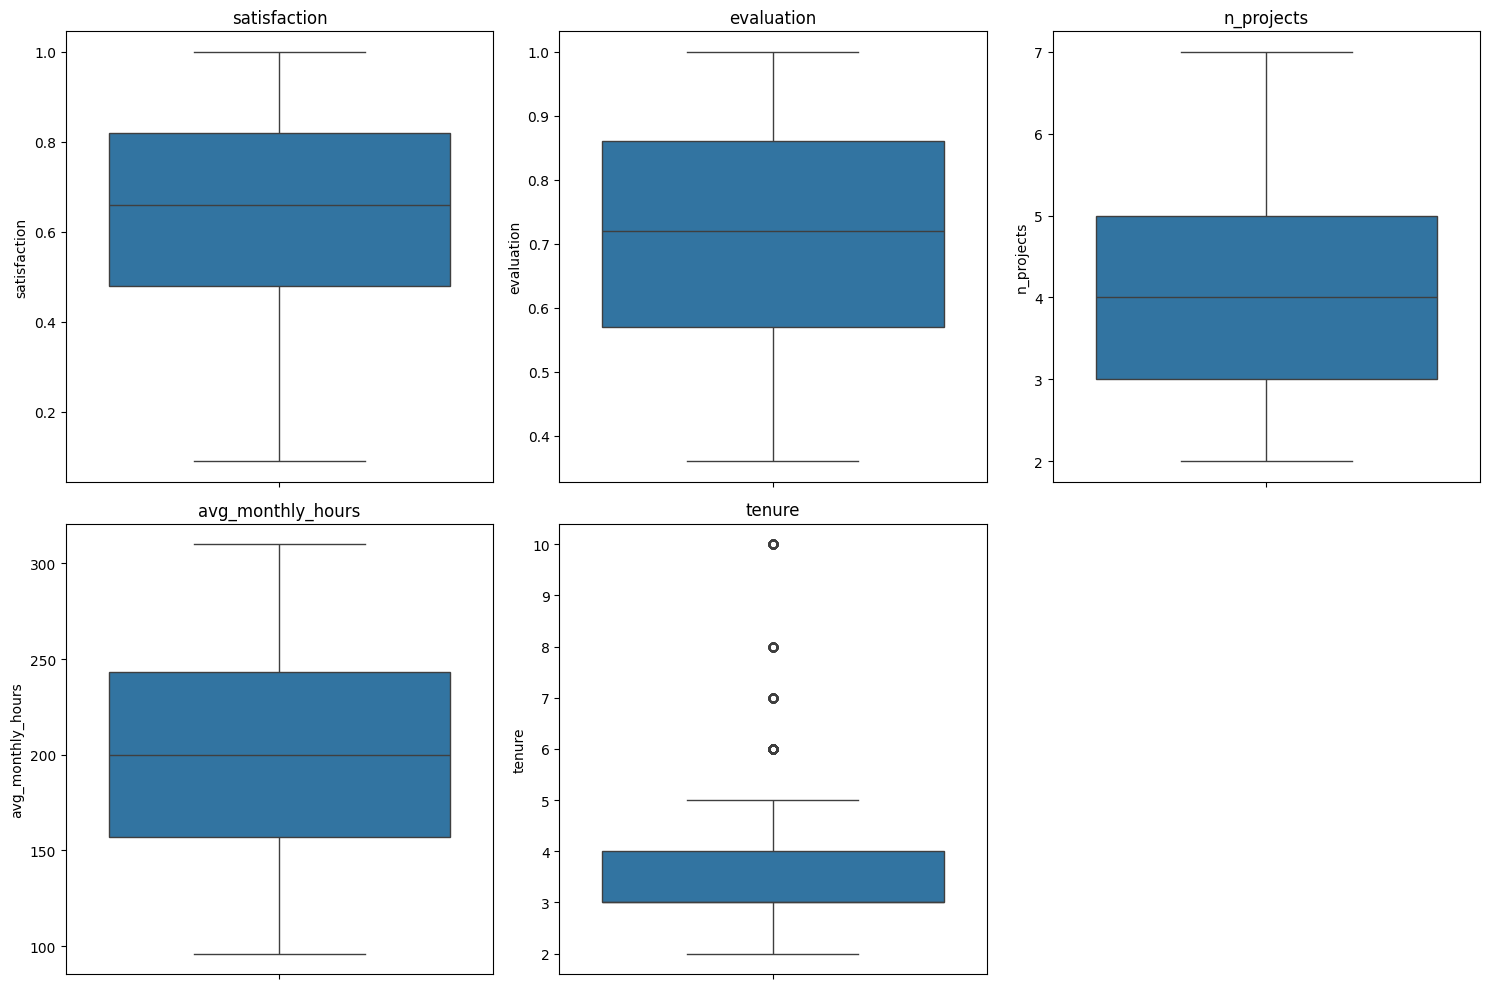

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots para las variables numéricas
variables_numericas = ['satisfaction', 'evaluation', 'n_projects', 'avg_monthly_hours', 'tenure']

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


✅ **Se ha eliminado duplicados y ahora se tiene 11.991 filas limpias**, lo que es una buena señal de calidad de datos.

🧪 **Respecto a los outliers en `tenure`**, es normal encontrar valores extremos en esa variable, ya que representa los años en la empresa. Por lo general, en este tipo de análisis:

- Un valor típico de `tenure` suele ir entre **1 y 6 años**.
- Valores superiores, como **7, 8, 9 o 10**, pueden representar **perfiles atípicos** (por ejemplo, empleados muy antiguos) y podrían tener un comportamiento distinto al promedio (**fieles o muy insatisfechos**).


🎯 **Siguiente paso: Distribución y relación con la variable objetivo**  
Vamos a visualizar cómo se relaciona `tenure` con `left` y también otras variables clave.

📈 **Distribución de empleados que se fueron vs. los que se quedaron**


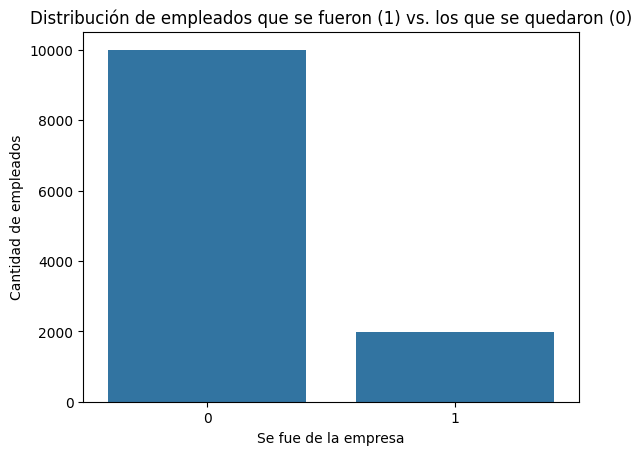

In [26]:
# Distribución general
sns.countplot(data=df, x='left')
plt.title('Distribución de empleados que se fueron (1) vs. los que se quedaron (0)')
plt.xlabel('Se fue de la empresa')
plt.ylabel('Cantidad de empleados')
plt.show()


📊 **Relación entre `tenure` y Rotación (`left`)**


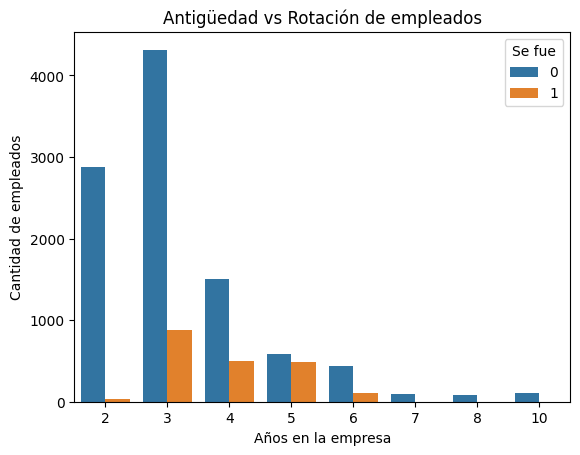

In [27]:
# Comparar tenure según si se fue o no
sns.countplot(data=df, x='tenure', hue='left')
plt.title('Antigüedad vs Rotación de empleados')
plt.xlabel('Años en la empresa')
plt.ylabel('Cantidad de empleados')
plt.legend(title='Se fue')
plt.show()


📊 **Distribución de empleados por Departamento y Salario**  
Analizaremos cómo se distribuyen los empleados según su departamento y nivel salarial para identificar patrones y posibles diferencias.


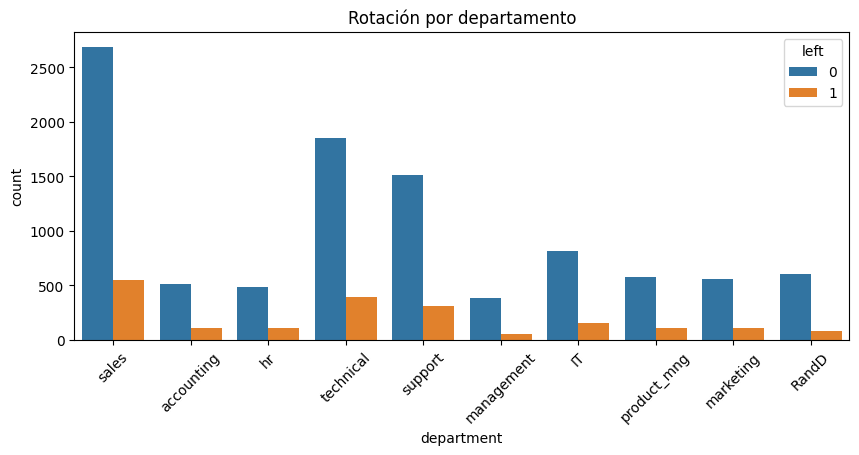

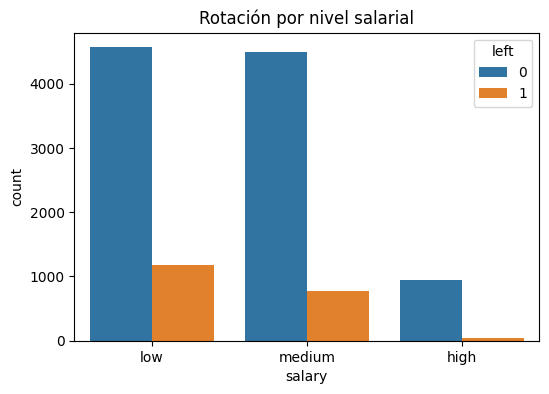

In [28]:
# Departamento
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='department', hue='left')
plt.title('Rotación por departamento')
plt.xticks(rotation=45)
plt.show()

# Salario
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Rotación por nivel salarial')
plt.show()


📌 **Conclusiones preliminares**

##### 🏆 Nivel salarial:
- Los trabajadores con **salario bajo** son los que más se van ➜ clara relación con la **rotación**.
- Los de **salario alto** prácticamente **no se van**.

##### 🏢 Departamento:
- Alta rotación en **ventas (`sales`)**, **técnico (`technical`)** y **soporte (`support`)**.
- Esto puede estar relacionado con el **tipo de tareas, carga laboral o condiciones de trabajo**.

##### ⏳ Antigüedad (`tenure`):
- A los **3 años** hay un **pico claro de renuncias** ➜ esto puede indicar un **punto crítico** (agotamiento, falta de ascenso, etc.).
- Después de **5 años**, la **rotación disminuye** ➜ quienes permanecen tienden a seguir.


✅ **Siguiente paso: Análisis de correlaciones**  
Veamos ahora cómo se relacionan numéricamente las variables entre sí, especialmente con `left` (la variable objetivo).

📊 **Mapa de calor de correlaciones**


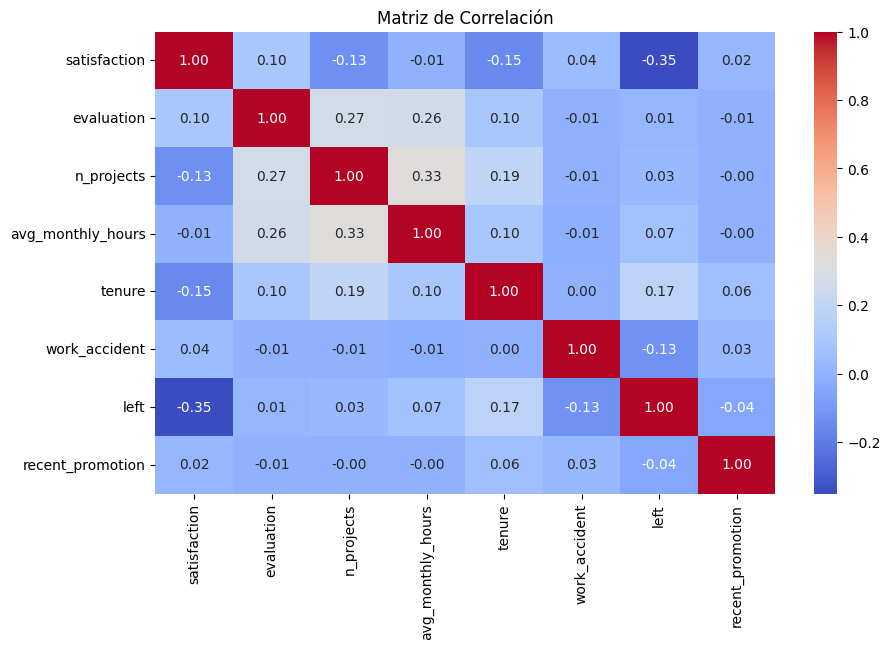

In [29]:
# Solo variables numéricas
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


🔍 **Análisis del mapa de correlación (variable objetivo: `left`)**

| **Variable**              | **Correlación con `left`** | **Interpretación** |
|---------------------------|---------------------------|---------------------|
| `satisfaction_level`      | -0.35                     | A menor satisfacción, mayor probabilidad de irse. |
| `work_accident`          | -0.15                     | Quienes tuvieron un accidente tienden a quedarse. |
| `tenure`                 | 0.17                      | Leve relación: a más años, podría haber más salida. |
| `number_project`         | 0.03                      | Casi sin relación. |
| `evaluation`             | 0.01                      | Sin relación significativa. |
| `average_monthly_hours`  | 0.07                      | Muy baja relación. Posible comportamiento no lineal. |
| `recent_promotion`      | -0.04                     | Leve tendencia a permanecer si fue promovido. |



✅ **Conclusiones clave:**
- La **satisfacción** es el **predictor más fuerte** entre las variables numéricas.
- `work_accident` y `recent_promotion` también son **relevantes**, aunque en menor medida.
- Las demás **variables numéricas** tienen **poca correlación lineal directa** con la salida, pero pueden tener **relaciones más complejas** o influir **combinadas**.


🚀 **Siguiente paso: Ingeniería de variables categóricas**  
Vamos a convertir las variables `Department` y `salary`, que son categóricas, a formato numérico utilizando codificación.  

Usaremos `pd.get_dummies()` para que puedas entrenar modelos luego.


In [31]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=["department", "salary"], drop_first=True)

# Revisamos el nuevo tamaño
print("Nuevo tamaño del dataset:", df_encoded.shape)
df_encoded.head()


Nuevo tamaño del dataset: (11991, 19)


,satisfaction,evaluation,n_projects,avg_monthly_hours,tenure,work_accident,left,recent_promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


✅ **Validación de resultados**  
- El dataset pasó de tener **10 columnas** a **19**, lo cual es coherente tras aplicar `pd.get_dummies()` sobre **2 columnas categóricas**.  
- Ahora tienes **variables binarias** como `salary_low`, `salary_medium`, y múltiples variables `department_*`, lo que permitirá a los modelos de **machine learning** interpretar adecuadamente esta información.


📌 **Siguientes pasos sugeridos**  
- **Escalar variables** (opcional, dependiendo del modelo que usarás).  
- **Separar variables predictoras** y la **variable objetivo (`left`)**.


In [42]:
X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]


📌 **División del dataset en entrenamiento y prueba**  
Separaremos el dataset en **train** y **test** para evaluar el rendimiento de los modelos de machine learning.


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
